## Data Import and Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

In [2]:
data = pd.read_csv('brewery_data_complete_extended.csv')
data

,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging
0,7870796,2020-01-01 00:00:19,Wheat Beer,Kegs,Whitefield,16,24.204251,5.289845,1.039504,5.370842,20,5,1:0.32:0.16,4666,2664.759345,8.577016,89.195882,4.104988,3.235485,4.663204
1,9810411,2020-01-01 00:00:31,Sour,Kegs,Whitefield,13,18.086763,5.275643,1.059819,5.096053,36,14,1:0.39:0.24,832,9758.801062,7.420541,72.480915,2.676528,4.246129,2.044358
2,2623342,2020-01-01 00:00:40,Wheat Beer,Kegs,Malleswaram,12,15.539333,4.778016,1.037476,4.824737,30,10,1:0.35:0.16,2115,11721.087016,8.451365,86.322144,3.299894,3.109440,3.033880
3,8114651,2020-01-01 00:01:37,Ale,Kegs,Rajajinagar,17,16.418489,5.345261,1.052431,5.509243,48,18,1:0.35:0.15,3173,12050.177463,9.671859,83.094940,2.136055,4.634254,1.489889
4,4579587,2020-01-01 00:01:43,Stout,Cans,Marathahalli,18,19.144908,4.861854,1.054296,5.133625,57,13,1:0.46:0.11,4449,5515.077465,7.895334,88.625833,4.491724,2.183389,2.990630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,4575645,2023-12-31 23:58:59,Stout,Bottles,Yelahanka,12,20.719151,4.944343,1.049876,5.437139,28,15,1:0.31:0.17,3054,6655.673836,6.264104,79.654815,4.612468,1.484389,1.118612
9999996,2074362,2023-12-31 23:59:18,Wheat Beer,Bottles,Electronic City,19,16.970908,5.121963,1.037019,5.102428,47,6,1:0.30:0.19,1985,10440.357817,9.651172,89.119201,2.112756,1.150946,4.972988
9999997,177617,2023-12-31 23:59:41,IPA,Bottles,Malleswaram,10,24.386184,4.747588,1.047490,5.025251,24,6,1:0.43:0.14,1982,17069.572855,9.060614,72.555455,3.393856,3.011241,2.115054
9999998,7306891,2023-12-31 23:59:45,Ale,Kegs,Electronic City,18,18.056172,5.007909,1.046138,5.843181,58,17,1:0.41:0.25,4016,5316.412808,6.297562,87.650899,4.095874,4.711502,1.535620


## Learning about Data - Datatypes, Null Values, Descriptive Analysis

In [3]:
# Check datatype of column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 20 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Batch_ID                      int64  
 1   Brew_Date                     object 
 2   Beer_Style                    object 
 3   SKU                           object 
 4   Location                      object 
 5   Fermentation_Time             int64  
 6   Temperature                   float64
 7   pH_Level                      float64
 8   Gravity                       float64
 9   Alcohol_Content               float64
 10  Bitterness                    int64  
 11  Color                         int64  
 12  Ingredient_Ratio              object 
 13  Volume_Produced               int64  
 14  Total_Sales                   float64
 15  Quality_Score                 float64
 16  Brewhouse_Efficiency          float64
 17  Loss_During_Brewing           float64
 18  Loss_During_Fermentat

In [4]:
""" Checking the descriptive statistics that summarize the central tendency, dispersion,
and shape of a dataset’s distribution. """

data.describe().apply(lambda x: x.apply('{0:.3f}'.format))

,Batch_ID,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging
count,10000000.000,10000000.000,10000000.000,10000000.000,10000000.000,10000000.000,10000000.000,10000000.000,10000000.000,10000000.000,10000000.000,10000000.000,10000000.000,10000000.000,10000000.000
mean,4999999.500,14.501,20.000,5.000,1.055,5.250,39.496,11.999,2749.031,10497.785,8.000,80.001,3.000,3.000,3.000
std,2886751.490,2.872,2.887,0.289,0.014,0.433,11.546,4.321,1299.078,5485.996,1.155,5.775,1.155,1.155,1.155
min,0.000,10.000,15.000,4.500,1.030,4.500,20.000,5.000,500.000,1000.001,6.000,70.000,1.000,1.000,1.000
25%,2499999.750,12.000,17.500,4.750,1.043,4.875,29.000,8.000,1623.000,5747.244,7.000,74.998,2.000,1.999,2.000
50%,4999999.500,15.000,20.000,5.000,1.055,5.250,39.000,12.000,2749.000,10496.291,8.000,80.003,3.000,3.000,3.001
75%,7499999.250,17.000,22.501,5.250,1.068,5.625,49.000,16.000,3874.000,15249.213,9.000,85.003,4.001,4.001,4.000
max,9999999.000,19.000,25.000,5.500,1.080,6.000,59.000,19.000,4999.000,20000.000,10.000,90.000,5.000,5.000,5.000


# Beer Production Data Description

| **Column Name**               | **Description**                                                                                  | **min** | **max** |
|-------------------------------|--------------------------------------------------------------------------------------------------|---------|---------|
| **Batch_ID**                  | A unique identifier assigned to each batch of beer produced.                                     |         |         |
| **Brew_Date**                 | The date on which the beer batch was brewed.                                                     |         |         |
| **Beer_Style**                | The style or type of beer, such as IPA, Stout, Lager, Ale, etc.                                  |         |         |
| **SKU**                       | The packaging type in which the beer is sold, like Kegs, Bottles, Cans, or Pints.                |         |         |
| **Location**                  | The location where the beer is produced or sold.                                                 |         |         |
| **Fermentation_Time**         | The duration of the fermentation process, measured in days.                                      | 10.000  | 19.000  |
| **Temperature**               | The average temperature (in Celsius) maintained during the brewing process.                      | 15.000  | 25.000  |
| **pH_Level**                  | The pH level of the beer, indicating its acidity or alkalinity.                                  | 4.500   | 5.500   |
| **Gravity**                   | A measure of the density of the beer as compared to water, indicating the potential alcohol content. | 1.030   | 1.080   |
| **Alcohol_Content**           | The percentage of alcohol by volume in the beer.                                                 | 4.500   | 6.000   |
| **Bitterness**                | The bitterness of the beer, measured in International Bitterness Units (IBU).                    | 20.000  | 59.000  |
| **Color**                     | The color of the beer measured using the Standard Reference Method (SRM).                        | 5.000   | 19.000  |
| **Ingredient_Ratio**          | The ratio of different ingredients used in the beer, such as malt, hops, etc.                    |         |         |
| **Volume_Produced**           | The volume of beer produced in the batch, measured in liters.                                    | 500.000 | 4999.000|
| **Total_Sales**               | The total sales generated from the batch, expressed in a currency unit.                          | 1000.001| 20000.000|
| **Quality_Score**             | An overall quality score assigned to the beer batch, rated out of 10.                            | 6.000   | 10.000  |
| **Brewhouse_Efficiency**      | The efficiency of the brewing process, expressed as a percentage.                                | 70.000  | 90.000  |
| **Loss_During_Brewing**       | The percentage of volume loss during the brewing process.                                        | 1.000   | 5.000   |
| **Loss_During_Fermentation**  | The percentage of volume loss during the fermentation process.                                   | 1.000   | 5.000   |
| **Loss_During_Bottling_Kegging** | The percentage of volume loss during the bottling or kegging process.                           | 1.000   | 5.000   |


In [5]:
# Finding null values in dataset

data.isnull().sum()

# We can see that there are no null values.

Batch_ID                        0
Brew_Date                       0
Beer_Style                      0
SKU                             0
Location                        0
Fermentation_Time               0
Temperature                     0
pH_Level                        0
Gravity                         0
Alcohol_Content                 0
Bitterness                      0
Color                           0
Ingredient_Ratio                0
Volume_Produced                 0
Total_Sales                     0
Quality_Score                   0
Brewhouse_Efficiency            0
Loss_During_Brewing             0
Loss_During_Fermentation        0
Loss_During_Bottling_Kegging    0
dtype: int64

### Dropping Batch_ID column

In [6]:
# After checking the batch_id column we can see that the column unique for each row. So, dropping the column.

data['Batch_ID'].value_counts()
data = data.drop(columns= ['Batch_ID'])

### Unique values in each column and count of each value

In [7]:
for col in data.columns:
    print(data[col].value_counts())

2022-05-29 06:50:13    5
2022-10-04 19:50:12    5
2021-09-26 17:49:16    5
2022-09-16 07:31:27    5
2020-02-26 10:42:04    5
                      ..
2021-05-11 16:55:43    1
2021-05-11 16:55:28    1
2021-05-11 16:55:06    1
2021-05-11 16:54:28    1
2023-12-31 23:59:54    1
Name: Brew_Date, Length: 9614455, dtype: int64
Ale           1251002
Porter        1250773
Sour          1250307
Stout         1250296
IPA           1249603
Lager         1249570
Pilsner       1249426
Wheat Beer    1249023
Name: Beer_Style, dtype: int64
Bottles    2501597
Pints      2500873
Cans       2498777
Kegs       2498753
Name: SKU, dtype: int64
HSR Layout         1000789
Jayanagar          1000760
Koramangala        1000220
Marathahalli       1000164
Rajajinagar        1000147
Indiranagar         999887
Yelahanka           999818
Malleswaram         999629
Electronic City     999307
Whitefield          999279
Name: Location, dtype: int64
13    1002039
17    1001838
18    1001023
11    1000379
15     999727
19

In [8]:
data.columns

Index(['Brew_Date', 'Beer_Style', 'SKU', 'Location', 'Fermentation_Time',
       'Temperature', 'pH_Level', 'Gravity', 'Alcohol_Content', 'Bitterness',
       'Color', 'Ingredient_Ratio', 'Volume_Produced', 'Total_Sales',
       'Quality_Score', 'Brewhouse_Efficiency', 'Loss_During_Brewing',
       'Loss_During_Fermentation', 'Loss_During_Bottling_Kegging'],
      dtype='object')

### Below Bar graphs can be used to say we have 8 types of Beer styles produced across 10 places

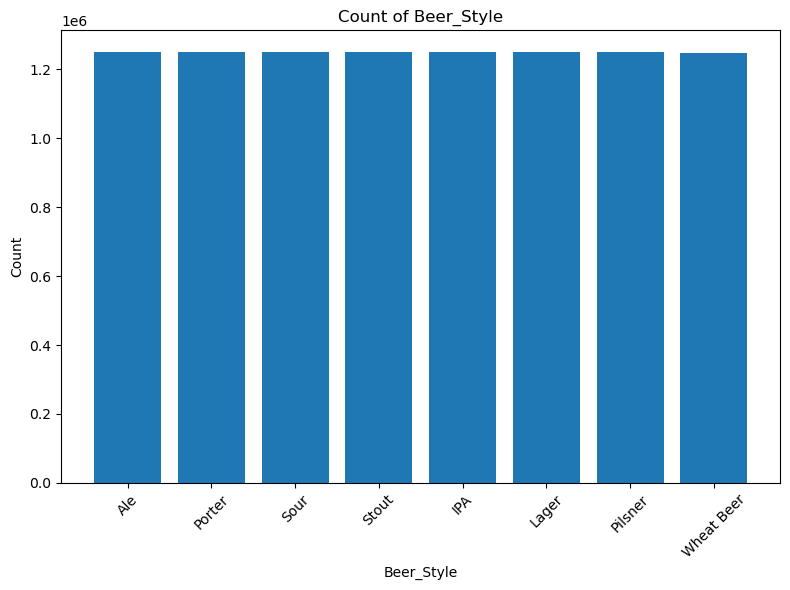

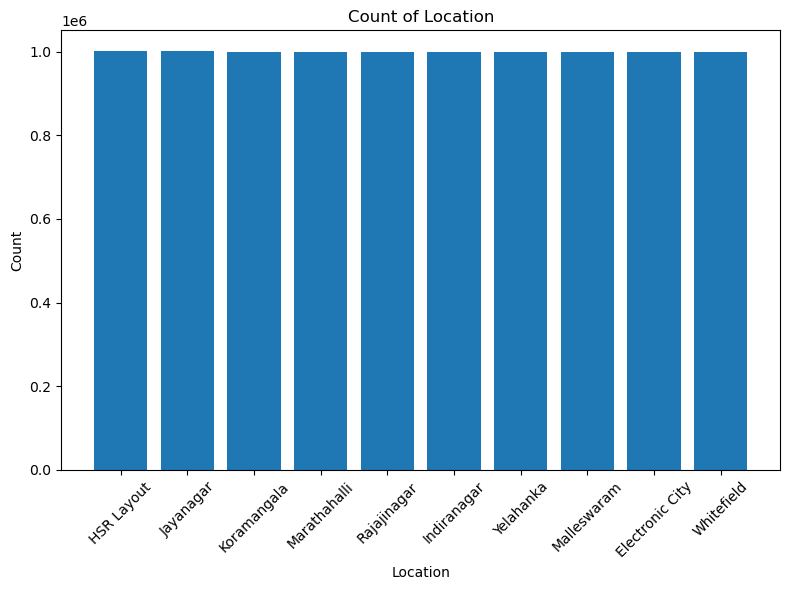

In [9]:
# Using Bar Graphs to represent Unique values and their respective count.

cols = ['Beer_Style','Location',]

for col in cols:
    value_counts = data[col].value_counts()
    plt.figure(figsize=(8, 6))
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f'Count of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Considering the Quality_score as main target, comparing what factors helped in producing high quality beers.

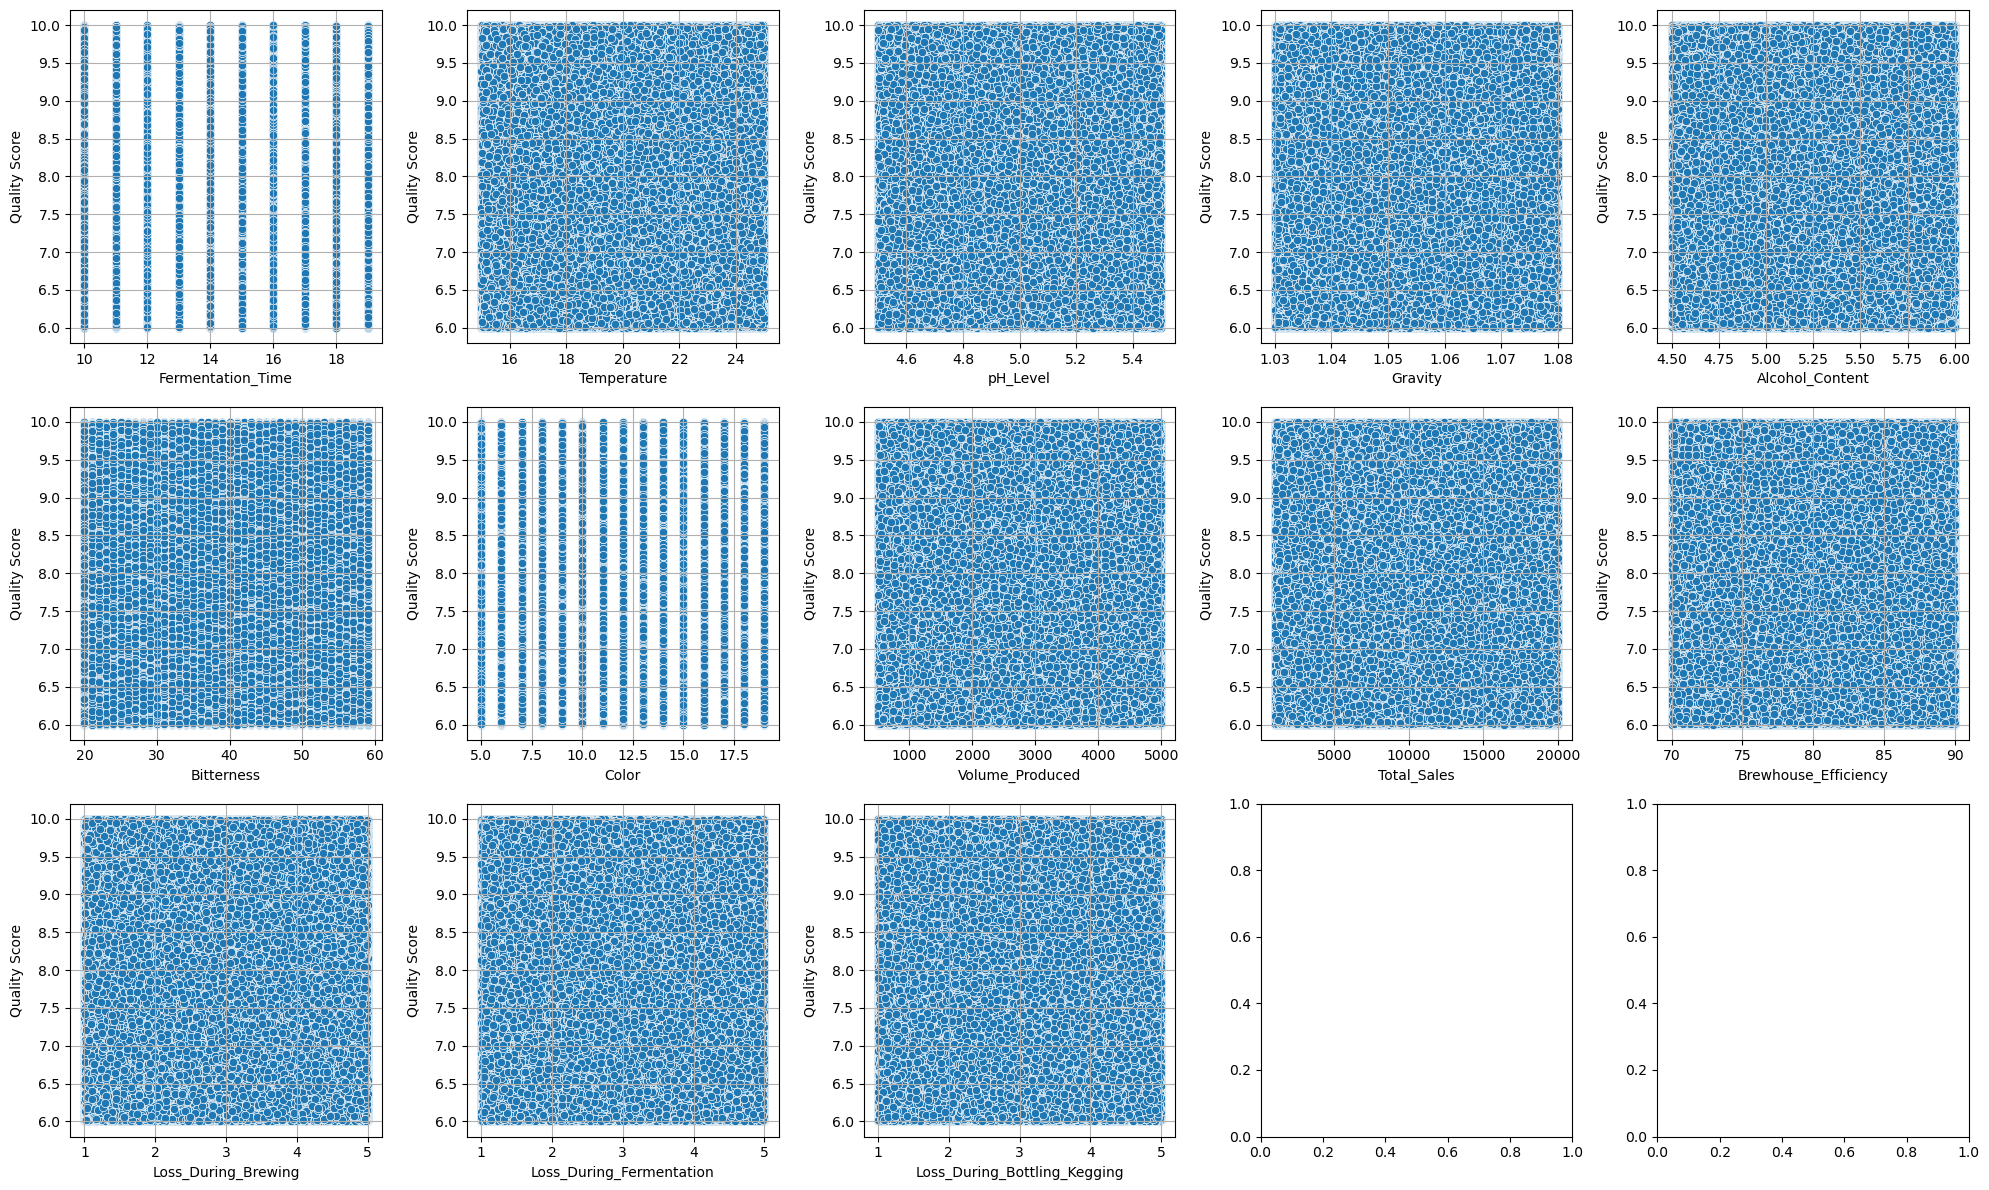

In [10]:
# Scatter plot to find relation between numerical columns and quality


cols = ['Fermentation_Time', 'Temperature', 'pH_Level', 'Gravity', 'Alcohol_Content', 
        'Bitterness', 'Color', 'Volume_Produced', 'Total_Sales', 'Brewhouse_Efficiency', 
        'Loss_During_Brewing', 'Loss_During_Fermentation', 'Loss_During_Bottling_Kegging']

# Create a figure with a grid layout
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.scatterplot(x=col, y='Quality_Score', data=data, ax=axes[i])
#     axes[i].set_title(f'Relationship between {col} and Quality Score')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Quality Score')
    axes[i].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


## Correlation between columns and quality score

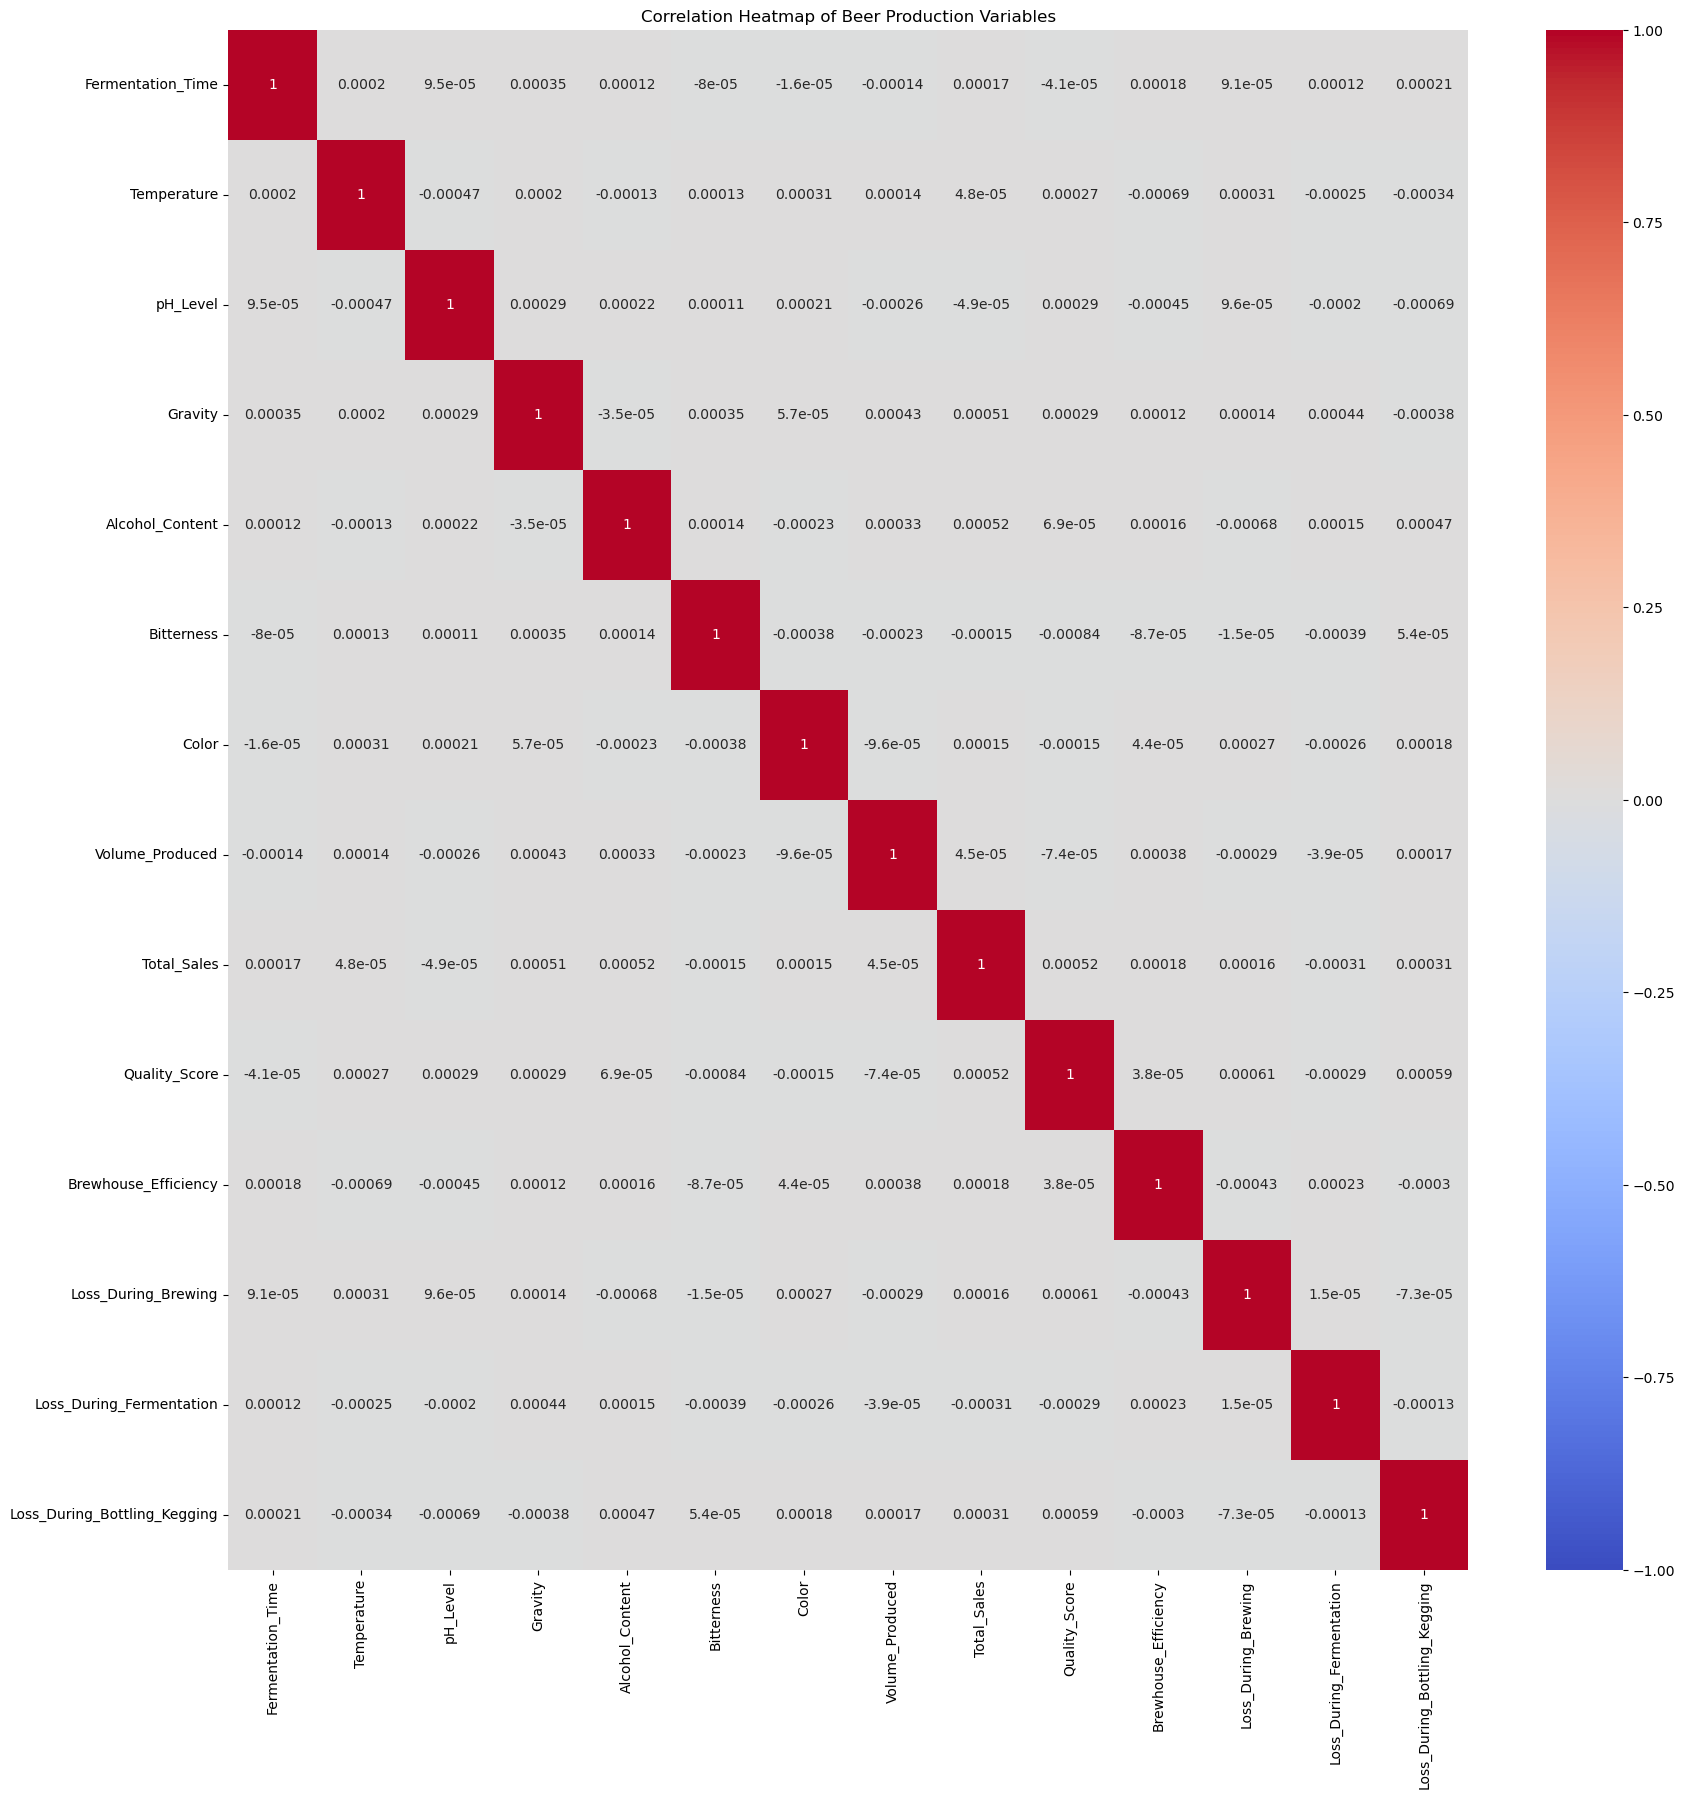

In [13]:
cols = ['Fermentation_Time', 'Temperature', 'pH_Level', 'Gravity', 'Alcohol_Content', 
        'Bitterness', 'Color', 'Volume_Produced', 'Total_Sales', 'Quality_Score', 
        'Brewhouse_Efficiency', 'Loss_During_Brewing', 'Loss_During_Fermentation', 
        'Loss_During_Bottling_Kegging']

corr_matrix = data[cols].corr()

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Beer Production Variables')
plt.show()

## There is no particular Correlation among columns

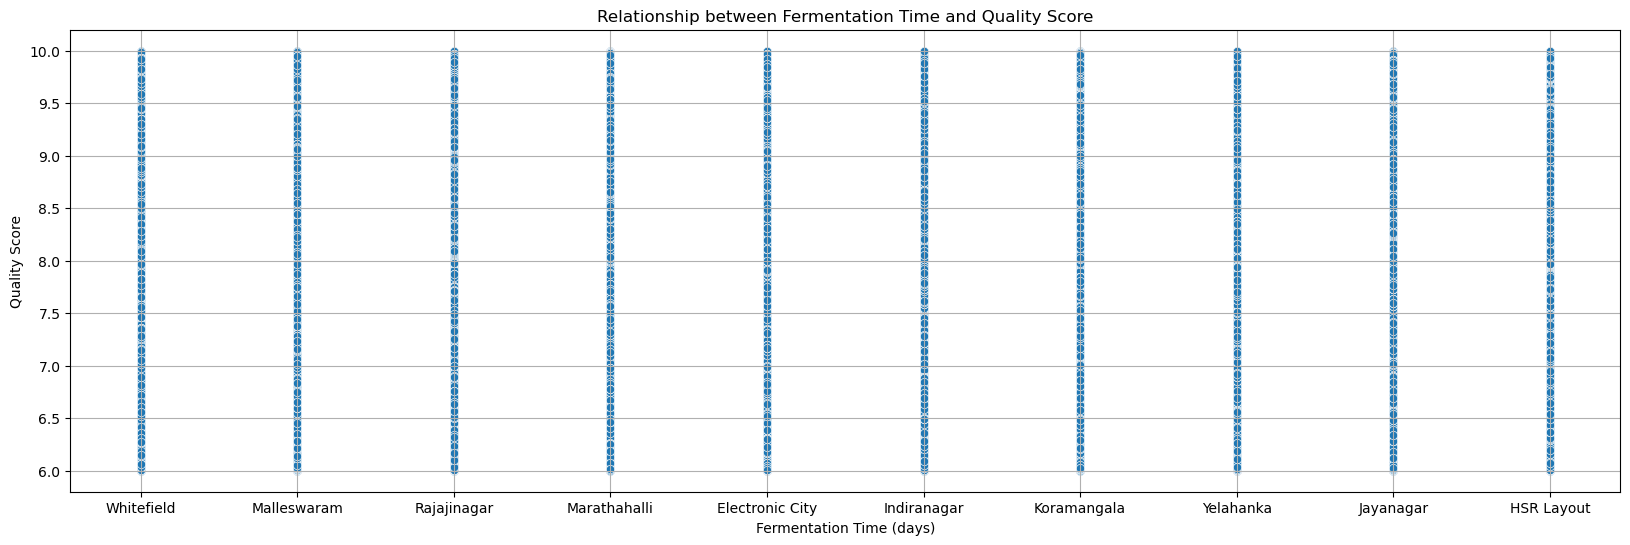

In [16]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Location', y='Quality_Score', data=data)
plt.title('Relationship between Fermentation Time and Quality Score')
plt.xlabel('Fermentation Time (days)')
plt.ylabel('Quality Score')
plt.grid(True)
plt.show()

# This is just a huge dataset wihich is quite uniformity in all columns and all values.